# Exploratory Data Analysis of Distribution of Effective Diffusivity

I will load the data from the analysis `20211202_72bar_full_analysis.ipynb`, which includes a list of the effective diffusivities fit to the bubble growth. I will then explore their distribution to see if there are any patterns.

In [1]:
# sets plotting font to Arial
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']


# standard libraries
import pickle as pkl

# 3rd party libraries
import numpy as np

# custom libraries
import sys
sys.path.append('../../libs/')
import plot.bubble as pltb
from conversions import *
sys.path.append('../src/')
import bubble

data_path = '../output/20211202_72bar_v12_legacy.pkl'

## Load Data

In [2]:
with open(data_path, 'rb') as f:
    dataset = pkl.load(f)
    
data = dataset['data']

## Extract Effective Diffusivity Constants `D`

In [3]:
D_list = []

for d in data.keys():
    d_data = data[d]
    for ID in d_data.keys():
        bub_data = d_data[ID]
        D = bub_data['D']
        D_list += [D]
        

## Plot Distribution of Effective Diffusivity Constants in Comparison with Measured Value

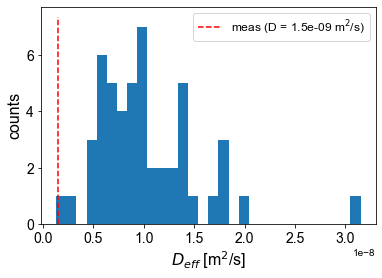

In [4]:
import matplotlib.pyplot as plt

# plot parameters
ax_fs = 16
tk_fs = 14
l_fs = 12
n_bins = 30
D_meas = 1.5E-9 # measured diffusivity at 72 bar sat., [m^2/s]

# plots histogram of effective diffusivity
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(D_list, n_bins)
# plots measured diffusivity for comparison
ax.plot([D_meas, D_meas], ax.get_ylim(), 'r--', label='meas (D = {0:g}'.format(D_meas) + r' m$^2$/s)')

# formats plot
ax.set_xlabel(r'$D_{eff}$ [m$^2$/s]', fontsize=ax_fs)
ax.set_ylabel('counts', fontsize=ax_fs)
ax.legend(fontsize=l_fs)
ax.tick_params(axis='both', labelsize=tk_fs)

## Plot Quality of Fit to Data

In [5]:
# USEFUL FUNCTIONS

def bub_fit(bub_data, ax=None, x_lim=None, y_lim=None, 
            t_fs=18, ax_fs=18, tk_fs=16, l_fs=14,
           x_log=False, y_log=False):
    """Plots bubble measurements and fit."""
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    # formats data
    t_bub = s_2_ms*(bub_data['t_bub'] - bub_data['t_nuc'])
    R_bub = m_2_um*bub_data['R_bub']
    t_fit = s_2_ms*(bub_data['t_fit'] - bub_data['t_nuc'])
    R_fit = m_2_um*np.asarray(bub_data['R_fit'])
    
    # plots data
    ax.plot(t_bub, R_bub, 'g^', label='meas')
    ax.plot(t_fit, R_fit, 'k--', label='fit')
    
    # formats plot
    ax.set_xlabel(r'$t$ [ms]', fontsize=ax_fs)
    ax.set_ylabel(r'$R$ [$\mu$m]', fontsize=ax_fs)
    ax.set_title('D = {0:g}'.format(bub_data['D']) + r' [m$^2$/s]', fontsize=t_fs)
    ax.tick_params(axis='both', labelsize=tk_fs)
    ax.legend(fontsize=l_fs)
    
    if x_lim is not None:
        ax.set_xlim(x_lim)
    if y_lim is not None:
        ax.set_ylim(y_lim)
    if x_log:
        ax.set_xscale('log')
    if y_log:
        ax.set_yscale('log')
        
    return ax
    

def n_bub_fits(data, n, x_lim=None, y_lim=None, x_log=False, y_log=False, plot_t23=False, l_fs=14):
    """Plots fits to n bubbles, each on a different figure."""
    ct = 0
    for d in data.keys():
        d_data = data[d]
        for ID in d_data.keys():
            bub_data = d_data[ID]

            # plots bubble data
            ax = bub_fit(bub_data, x_lim=x_lim, y_lim=y_lim, 
                        x_log=x_log, y_log=y_log)
            # 
            if plot_t23:
                t = np.linspace(1E-3, 1, 100)
                R = 10*t**(2/3)
                ax.plot(t, R, 'r--', label=r'$t^{2/3}$')
                ax.legend(fontsize=l_fs)

            ct += 1
            if ct == n:
                break
        if ct == n:
            break

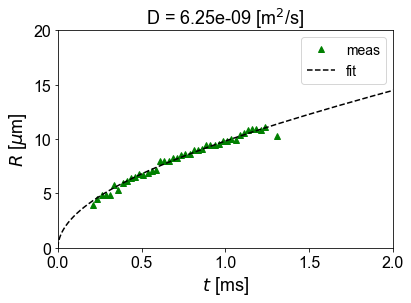

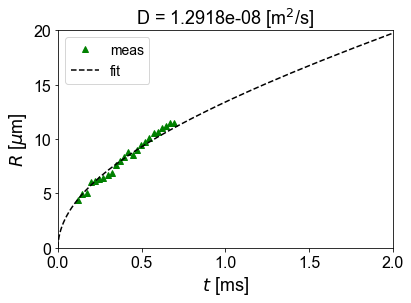

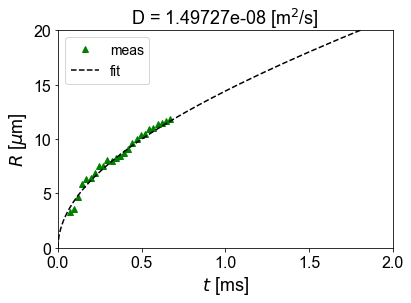

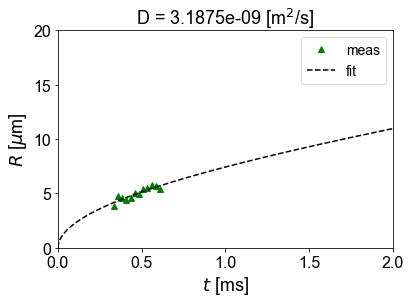

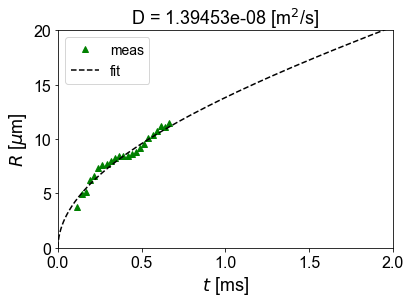

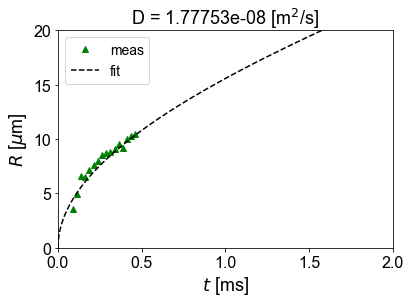

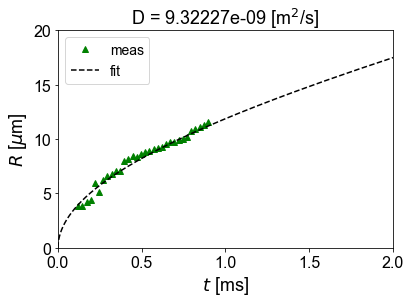

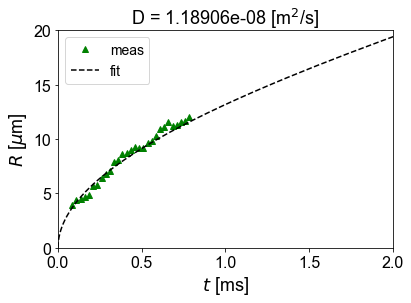

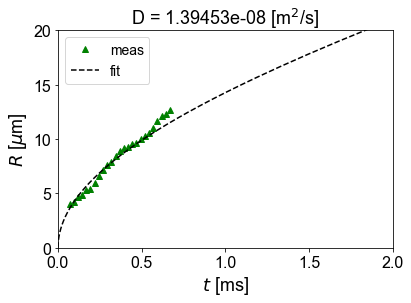

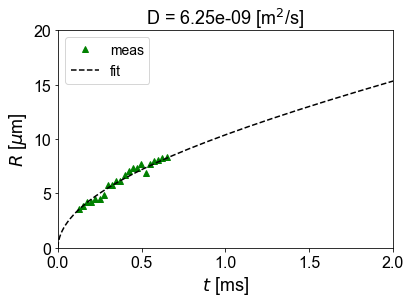

In [6]:
n = 10

x_lim = [0, 2]
y_lim = [0, 20]

n_bub_fits(data, n, x_lim=x_lim, y_lim=y_lim)

The fits to the data are convincing, although some data show odd behavior (oscillation on top of growth).

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warnin

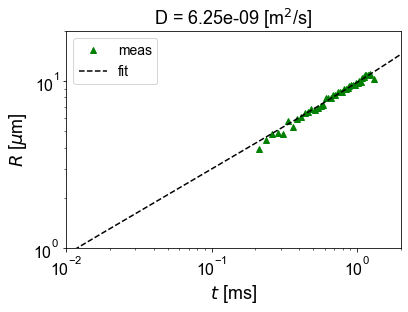

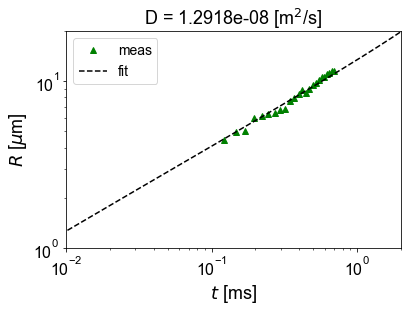

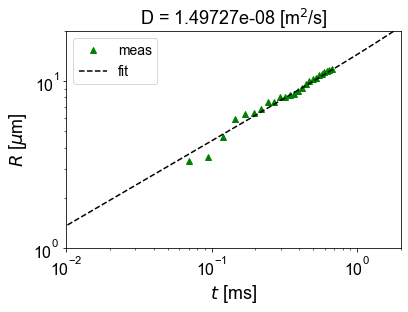

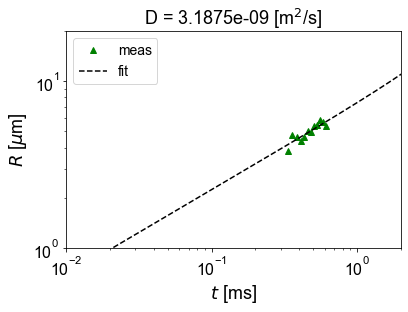

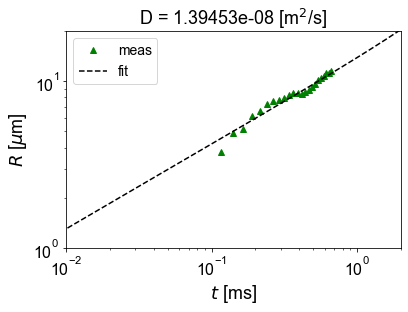

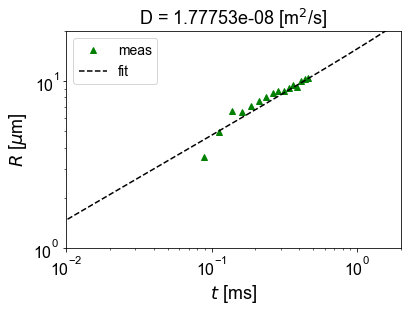

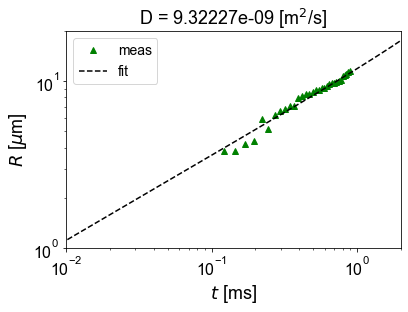

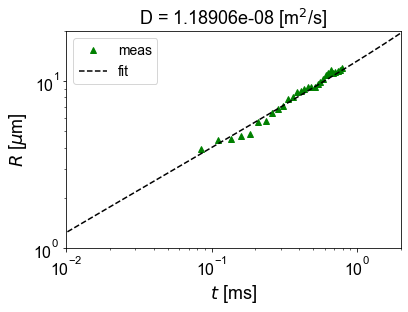

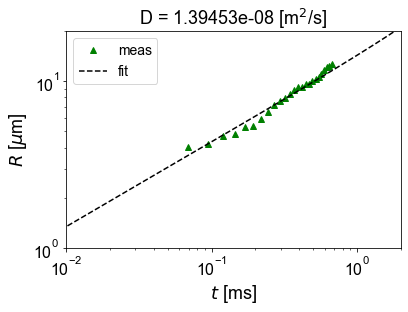

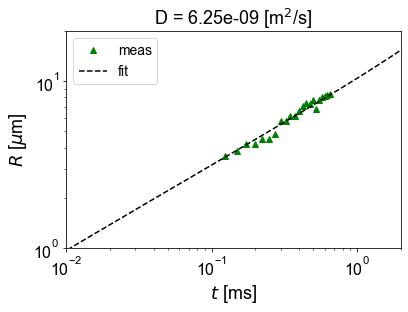

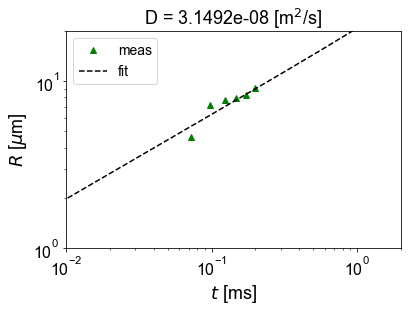

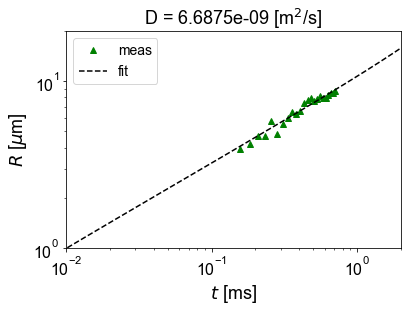

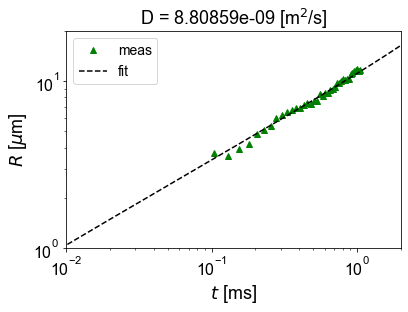

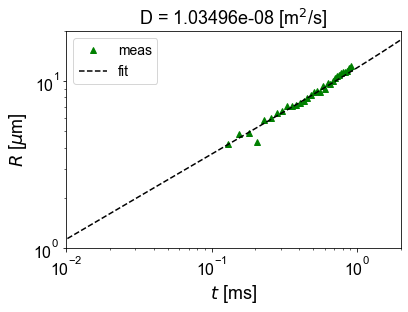

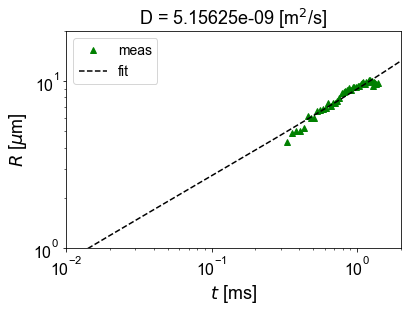

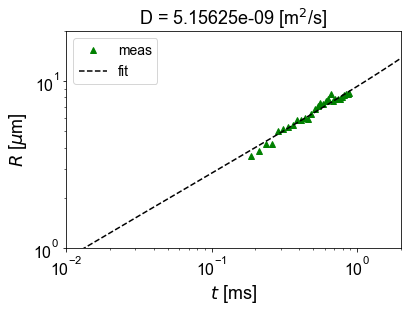

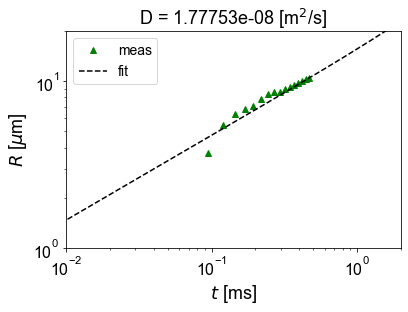

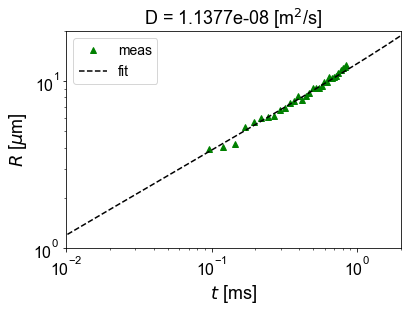

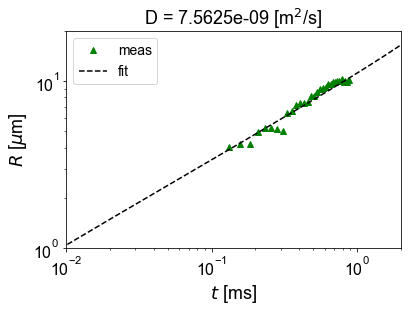

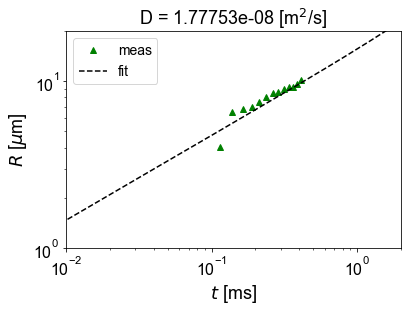

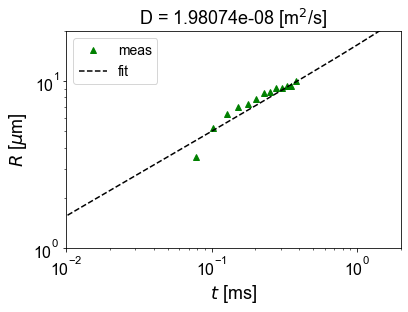

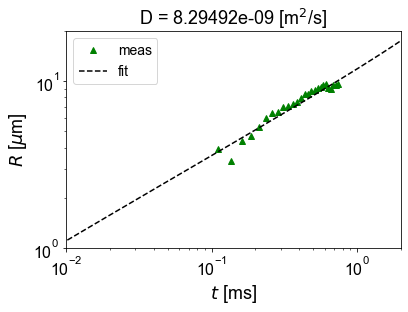

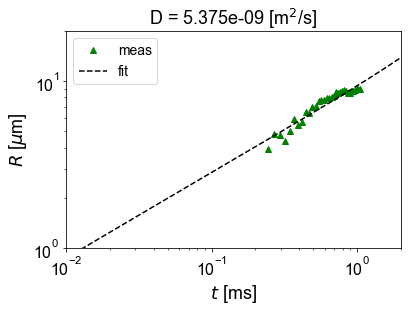

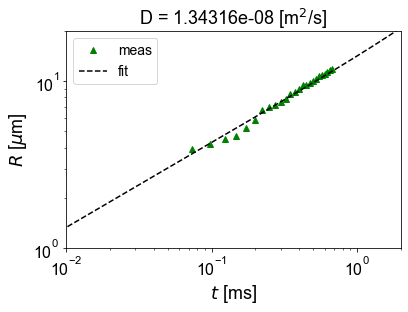

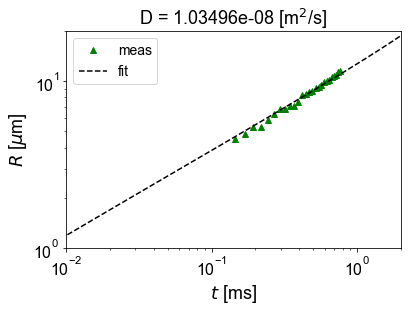

In [7]:
n = 25

x_lim = [1E-2, 2]
y_lim = [1, 20]

n_bub_fits(data, n, x_lim=x_lim, y_lim=y_lim, x_log=True, y_log=True, plot_t23=False)

## Flow Estimated Around and Inside Bubble

Based on Deen's Transport book, p. 325, assuming an inviscid bubble.

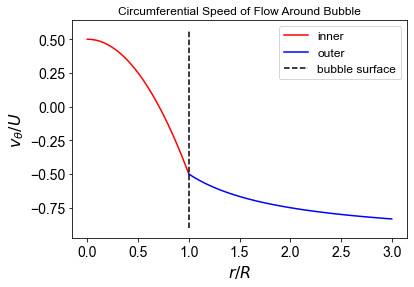

In [10]:
import matplotlib.pyplot as plt
import numpy as np


r1 = np.linspace(0, 1, 100)
r2 = np.linspace(1, 3, 100)

v1 = 1/2*(1-2*r1**2)
v2 = -(1-0.5/r2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r1, v1, 'r', label='inner')
ax.plot(r2, v2, 'b', label='outer')
ax.plot([1, 1], ax.get_ylim(), 'k--', label='bubble surface')
ax.set_title('Circumferential Speed of Flow Around Bubble')
ax.set_xlabel(r'$r/R$', fontsize=ax_fs)
ax.set_ylabel(r'$v_{\theta}/U$', fontsize=ax_fs)
ax.tick_params(axis='both', labelsize=tk_fs)
plt.legend(fontsize=l_fs)